In [93]:
import keras
import tensorflow
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install umap-learn
!pip install scikit-learn


# Preparing Data

In [94]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [95]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [96]:
x_train, x_valid, y_train, y_valid = train_test_split(X_train, X_train, test_size=0.1, shuffle= True)

# Preparing Model

In [97]:
encoder_model = keras.models.Sequential([

    #Encoder
    keras.layers.InputLayer((28,28,1)),
    keras.layers.Conv2D(64,(3,3), padding="same"),
    keras.layers.Conv2D(128,(3,3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(256,(3,3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    #BottleNeck
    keras.layers.Conv2D(1,(1,1),padding="same",activation="relu"),
    keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.05),
    keras.layers.Dense(49,activation="relu"),
    
    #Decoder
    keras.layers.Dense(49,activation="relu"),
#     keras.layers.Reshape((7,7,1)),
    
#     tf.keras.layers.Conv2DTranspose(32,(5,5)),
#     keras.layers.Conv2D(64,(3,3), padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.ReLU(),
    
#     tf.keras.layers.Conv2DTranspose(64,(4,4)),
#     keras.layers.Conv2D(64,(3,3), padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.ReLU(),
    
#     keras.layers.Conv2D(1,(1,1)),
    
#     keras.layers.UpSampling2D(size=(2, 2), data_format=None, interpolation='bicubic')
    keras.layers.Dense(784,activation="relu"),
    keras.layers.Reshape((28,28,1)),
    keras.layers.Conv2D(64,(3,3), padding="same",activation="relu"),
    keras.layers.Conv2D(1,(1,1)),
])
def root_mean_squared_error(y_true, y_pred):
        return tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(y_pred - y_true))) 
encoder_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),loss=root_mean_squared_error)
encoder_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_12 (Ba  (None, 28, 28, 128)       512       
 tchNormalization)                                               
                                                                 
 re_lu_12 (ReLU)             (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 256)      

# Training

In [98]:
encoder_model.fit(x_train,y_train,batch_size = 256, epochs = 25,validation_data=(x_valid,y_valid))

Epoch 1/25
211/211 [==============================] - 10s 30ms/step - loss: 0.2188 - val_loss: 0.2937
Epoch 2/25
211/211 [==============================] - 5s 25ms/step - loss: 0.1653 - val_loss: 0.1805
Epoch 3/25
211/211 [==============================] - 5s 25ms/step - loss: 0.1552 - val_loss: 0.1404
Epoch 4/25
211/211 [==============================] - 5s 25ms/step - loss: 0.1499 - val_loss: 0.1326
Epoch 5/25
211/211 [==============================] - 5s 26ms/step - loss: 0.1461 - val_loss: 0.1288
Epoch 6/25
211/211 [==============================] - 5s 25ms/step - loss: 0.1434 - val_loss: 0.1288
Epoch 7/25
211/211 [==============================] - 5s 25ms/step - loss: 0.1412 - val_loss: 0.1246
Epoch 8/25
211/211 [==============================] - 5s 25ms/step - loss: 0.1394 - val_loss: 0.1252
Epoch 9/25
211/211 [==============================] - 5s 26ms/step - loss: 0.1381 - val_loss: 0.1246
Epoch 10/25
211/211 [==============================] - 5s 25ms/step - loss: 0.1368 - val_l

# Visualising Data

In [99]:
y_pred=encoder_model.predict(X_train)

1875/1875 [==============================] - 4s 2ms/step


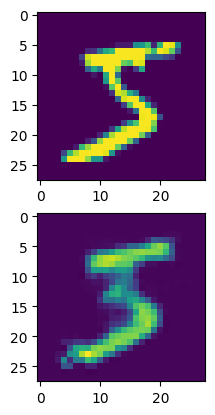

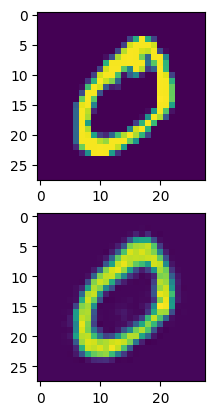

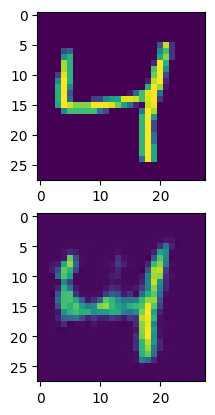

In [100]:
for i in range(3):
    fig,axs=plt.subplots(2,1)
    axs[0].imshow(X_train[i])
    axs[1].imshow(y_pred[i])
    plt.show()


313/313 [==============================] - 1s 2ms/step


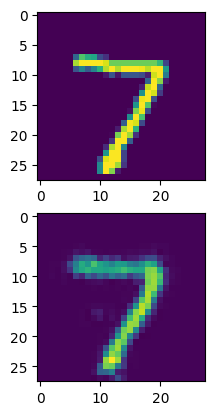

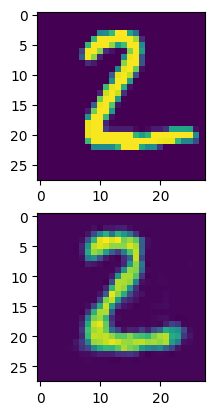

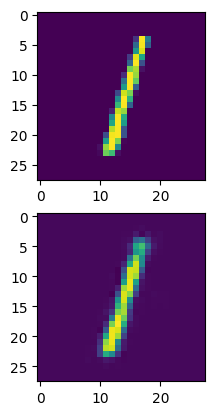

In [101]:
y_pred_test=encoder_model.predict(X_test)
for i in range(3):
    fig,axs=plt.subplots(2,1)
    axs[0].imshow(X_test[i])
    axs[1].imshow(y_pred_test[i])
    plt.show()

In [102]:
embedding_model = keras.Model(encoder_model.input,encoder_model.layers[12].output)
embedding_model.trainable  = False
embedding_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_12 (Ba  (None, 28, 28, 128)       512       
 tchNormalization)                                               
                                                                 
 re_lu_12 (ReLU)             (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                     

In [103]:
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan

def watch(data,labels):
    data=pd.DataFrame(embedding_model.predict(data))
    reducer = hdbscan.HDBSCAN()
    reducer = umap.UMAP()
    sd=StandardScaler()
    data.loc[:,:] = sd.fit_transform(data)
    result=reducer.fit_transform(data)
    result=pd.DataFrame(result)
    result["labels"] = labels
    sns.scatterplot(data=result,x=0,y=1,hue="labels")
    return result

1875/1875 [==============================] - 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

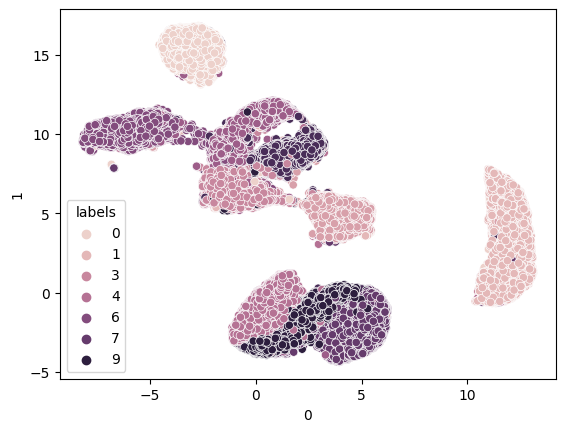

In [104]:
result=watch(X_train,Y_train)

313/313 [==============================] - 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

,0,1,labels
0,3.909703,9.512302,7
1,5.498187,3.029804,2
2,-4.609255,5.516966,1
3,14.797508,2.055664,0
4,6.772728,12.743503,4
...,...,...,...
9995,5.771905,2.297674,2
9996,10.629721,3.820733,3
9997,7.105565,10.148294,4
9998,11.318802,0.217407,5


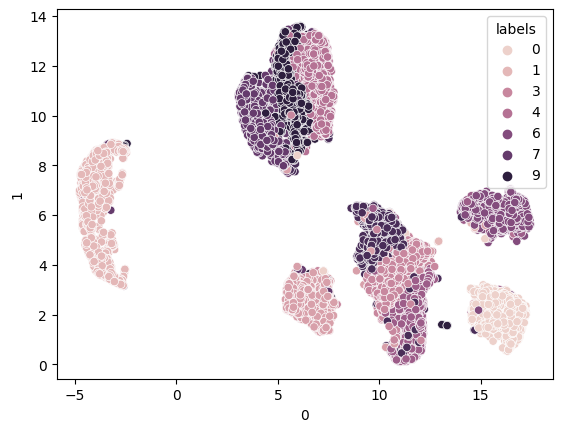

In [105]:
watch(X_test,Y_test)